In [9]:
import glob # For getting file names
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns
# import torch

from collections import Counter
# from gap_statistic import OptimalK
from scipy import stats, cluster
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

from utils.clustering_utils import *
from utils.conformal_utils import *
from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run

In [2]:
# Places365
softmax_path = '../class-conditional-conformal-datasets/notebooks/.cache/best-Places365-model-valsoftmax_frac=0.1.npy'
labels_path = '../class-conditional-conformal-datasets/notebooks/.cache/best-Places365-model-vallabels_frac=0.1.npy'
save_folder = '.cache/paper/places365'

# # ImageNet
# softmax_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_softmax.npy'
# labels_path = '/home/tding/data/finetuned_imagenet/imagenet_train_subset_labels.npy'
# save_folder = '.cache/paper/imagenet'

# # CIFAR-100
# softmax_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-valsoftmax_frac=0.3.npy"
# labels_path = "../class-conditional-conformal-datasets/notebooks/.cache/best-cifar100-model-vallabels_frac=0.3.npy"
# save_folder = '.cache/paper/cifar100'
 
# SETTINGS
alpha = .1
n_totalcal_list = [10, 30]
score_function_list = ['softmax', 'APS', 'RAPS'] # RAPS will be run with ImageNet-tuned parameter settings
seeds = [0,1,2,3,4,5,6,7,8,9]

In [3]:
%%time

softmax_scores = np.load(softmax_path)
labels = np.load(labels_path)

CPU times: user 1.5 ms, sys: 263 ms, total: 265 ms
Wall time: 267 ms


In [4]:
print('softmax_scores shape:', softmax_scores.shape) # (183996, 365)
print('Class counts:', Counter(labels).most_common())

softmax_scores shape: (183996, 365)
Class counts: [(230, 576), (357, 573), (34, 568), (364, 567), (30, 564), (55, 562), (212, 559), (50, 554), (254, 551), (196, 550), (264, 550), (133, 549), (7, 549), (258, 548), (98, 547), (181, 547), (106, 547), (201, 545), (90, 544), (110, 544), (82, 544), (225, 544), (119, 543), (327, 543), (286, 543), (226, 543), (112, 542), (79, 541), (331, 541), (309, 541), (239, 540), (297, 540), (105, 540), (352, 540), (14, 539), (152, 539), (241, 539), (84, 538), (321, 538), (350, 538), (107, 537), (29, 537), (179, 537), (345, 537), (204, 537), (22, 536), (197, 536), (53, 535), (61, 534), (20, 534), (319, 534), (335, 534), (302, 534), (164, 534), (265, 533), (233, 533), (251, 533), (268, 532), (246, 532), (8, 532), (301, 532), (229, 532), (290, 531), (306, 531), (287, 530), (108, 530), (31, 530), (193, 530), (19, 530), (340, 529), (338, 529), (40, 529), (130, 528), (363, 528), (281, 527), (261, 527), (148, 526), (6, 526), (311, 526), (280, 526), (314, 525), (

In [ ]:
%%time

run_experiment(softmax_scores, labels,
                  save_folder,
                  alpha=alpha,
                  n_totalcal_list=n_totalcal_list,
                  score_function_list = score_function_list,
                  seeds=seeds)

====== score_function=softmax ======
Computing conformal score...

seed=0
Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [175, 115, 53, 22]
Heuristic chose n_clustering=8, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [175, 115, 53, 22]
Saved results to .cache/paper/places365/n_totalcal=10/score=softmax/seed=0_allresults.pkl

seed=1
Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [178, 113, 51, 23]
Heuristic chose n_clustering=8, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [178, 113, 51, 23]
Saved results to .cache/paper/places365/n_totalcal=10/score=softmax/seed=1_allresults.pkl

seed=2
Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [157, 103, 70, 35]
Heuristic chose n_clustering=8, num_clusters=4
p=0.0 for one cluster null hypothesis, so running Clustered Conformal
Cluster sizes: [157, 103, 70, 35]
Saved results to .cache/paper/plac

Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [124, 115, 70, 56]
Heuristic chose n_clustering=8, num_clusters=4
p=0.03 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/places365/n_totalcal=10/score=RAPS/seed=6_allresults.pkl

seed=7
Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [156, 99, 93, 17]
Heuristic chose n_clustering=8, num_clusters=4
p=0.32 for one cluster null hypothesis, so running Standard Conformal
Saved results to .cache/paper/places365/n_totalcal=10/score=RAPS/seed=7_allresults.pkl

seed=8
Heuristic chose n_clustering=8, num_clusters=4
Cluster sizes: [148, 124, 58, 35]
Heuristic chose n_clustering=8, num_clusters=4
p=0.01 for one cluster null hypothesis, so running Standard Conformal


In [7]:
for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        print(f'===== n_totalcal={n_totalcal}, score={score} =====')
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        average_results_across_seeds(folder)

===== n_totalcal=10, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.63073695 4.53016998 4.34917817 4.42285952 4.76169369 4.57428981
 4.63266417 4.61561149 4.46500641 4.59001507]
  classwise: [6.35106783 6.91522542 6.38069279 6.55391159 6.67556995 7.04977186
 5.95226339 6.89162867 6.80800213 6.71126111]
  smart_cluster: [3.96602592 4.17253987 4.1189583  3.81367554 4.02311735 4.42743843
 3.73084112 4.01526399 4.29607075 4.26608299]
  always_cluster: [3.96602592 4.17253987 4.1189583  3.81367554 4.02311735 4.42743843
 3.73084112 4.01526399 4.29607075 4.26608299]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.557223,0.113248,21.978495,0.952326,6.895214,0.226772
1,classwise,6.628939,0.311679,39.430374,5.396893,17.082802,1.259444
2,smart_cluster,4.083001,0.206222,21.273905,7.148020,7.647500,1.213261
3,always_cluster,4.083001,0.206222,21.273905,7.148020,7.647500,1.213261


===== n_totalcal=10, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.33444634 3.23769851 3.2496347  3.23350941 3.37419939 3.22620914
 3.27763505 3.52088563 3.25114455 3.30507339]
  classwise: [6.29714737 6.7216134  6.81549643 6.59204345 6.80184756 7.06215079
 6.14072749 7.46023201 7.01751353 6.74730095]
  smart_cluster: [3.33444634 3.23769851 3.2496347  3.23350941 3.37419939 3.22620914
 3.27763505 3.52088563 3.25114455 3.45864906]
  always_cluster: [2.94150245 3.63592091 3.92608984 3.35789776 3.3543605  3.3392656
 3.4583549  3.18495492 3.56739431 3.45864906]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.301044,0.086411,18.260870,1.157385,10.742921,0.447647
1,classwise,6.765607,0.357774,41.094811,5.806702,22.468075,1.475570
2,smart_cluster,3.316401,0.098556,18.302277,1.175028,10.688661,0.494580
3,always_cluster,3.422439,0.250254,15.049659,3.633450,11.567404,1.750733


===== n_totalcal=10, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.81423903 3.78417474 3.86325633 3.83397007 3.89146197 3.79340388
 3.79694211 3.86465914 3.78805985 3.79120875]
  classwise: [6.48324085 7.01072219 6.68207134 6.5839404  6.734686   6.8421474
 6.15363004 7.4164663  6.90379286 6.95461871]
  smart_cluster: [3.81423903 3.78417474 3.86325633 3.83397007 3.89146197 3.79340388
 3.79694211 3.86465914 3.78805985 3.79120875]
  always_cluster: [3.75421986 4.80585821 4.27813855 3.99506102 3.86099258 3.76808902
 3.83911188 3.68421334 3.76136711 3.95500672]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.822138,0.036779,19.648033,1.125654,7.940050,0.251879
1,classwise,6.776532,0.322237,40.579207,6.319748,20.061266,1.581733
2,smart_cluster,3.822138,0.036779,19.648033,1.125654,7.940050,0.251879
3,always_cluster,3.970206,0.321870,18.276437,4.051518,8.575164,1.041204


===== n_totalcal=30, score=softmax =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [4.44666867 4.56381041 4.57972108 4.44236854 4.69046249 4.44772006
 4.57290406 4.65416489 4.62930428 4.58820017]
  classwise: [4.40578588 4.44439099 4.35362742 4.08533818 4.35419299 4.23456898
 4.13819502 4.04545074 4.2062435  4.17793362]
  smart_cluster: [3.26538324 3.3208328  3.44474647 3.16422927 3.30403579 3.18701521
 3.1919693  3.22786621 2.96101601 3.19711699]
  always_cluster: [3.26538324 3.3208328  3.44474647 3.16422927 3.30403579 3.18701521
 3.1919693  3.22786621 2.96101601 3.19711699]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,4.561532,0.084451,22.058637,0.844482,6.884584,0.146763
1,classwise,4.244573,0.131209,20.363111,3.520931,10.366731,0.209286
2,smart_cluster,3.226421,0.119176,14.606852,2.791250,7.924477,0.355833
3,always_cluster,3.226421,0.119176,14.606852,2.791250,7.924477,0.355833


===== n_totalcal=30, score=APS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.28810623 3.3124631  3.35519065 3.26535126 3.40010172 3.22080862
 3.35164404 3.4111334  3.30809161 3.29209963]
  classwise: [4.1802152  4.35161473 4.29505983 4.09120077 4.32451419 3.95002792
 4.23154836 4.4040846  4.46928537 4.3024521 ]
  smart_cluster: [3.28810623 2.96928404 3.13939966 3.26535126 3.40010172 3.22080862
 3.35164404 3.4111334  3.30809161 3.29209963]
  always_cluster: [2.71297796 2.96928404 3.13939966 2.91797577 3.00040658 2.90648193
 2.89347428 2.85150559 2.77074847 2.82586068]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.320499,0.056372,18.250540,1.129736,10.817596,0.399302
1,classwise,4.260000,0.145567,22.834260,3.835525,14.805267,0.449469
2,smart_cluster,3.264602,0.124665,17.106033,2.332696,10.866599,0.414861
3,always_cluster,2.898811,0.114943,14.351181,3.017823,11.760721,0.675027


===== n_totalcal=30, score=RAPS =====
Number of seeds found: 10
Avg class coverage gap for each random seed:
  standard: [3.85548229 3.83265417 3.84652092 3.85225938 3.92038004 3.82900256
 3.83580758 3.85929881 3.82597239 3.843135  ]
  classwise: [4.38249062 4.39673511 4.46572267 4.1937089  4.21769452 4.06896054
 4.28290445 4.07014115 4.29175364 4.02887022]
  smart_cluster: [3.40330069 3.69437527 3.38870108 3.33017691 3.92038004 3.39872994
 3.42190296 3.07725774 3.28850238 3.34275039]
  always_cluster: [3.40330069 3.69437527 3.38870108 3.33017691 3.59298715 3.39872994
 3.42190296 3.07725774 3.28850238 3.34275039]


,method,class_cov_gap_mean,class_cov_gap_se,max_class_cov_gap_mean,max_class_cov_gap_se,avg_set_size_mean,avg_set_size_se
0,standard,3.850051,0.025797,19.848812,0.701861,7.964648,0.147117
1,classwise,4.239898,0.143409,21.246534,3.700256,12.014924,0.226424
2,smart_cluster,3.426608,0.218115,15.399632,2.868328,9.102696,0.643985
3,always_cluster,3.393868,0.157763,15.004508,2.226170,9.214913,0.457836


Number of seeds found: 10


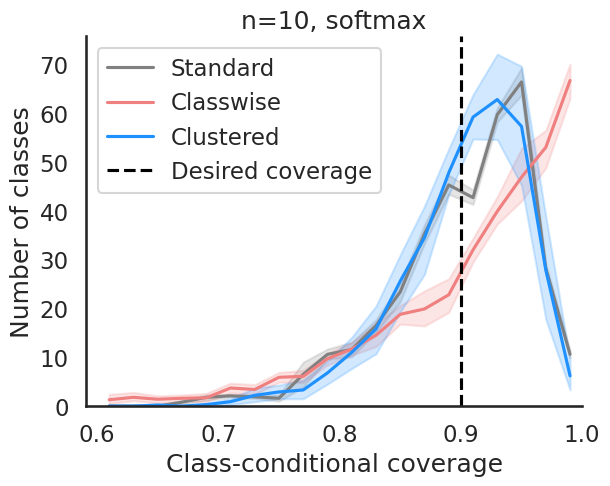

Number of seeds found: 10


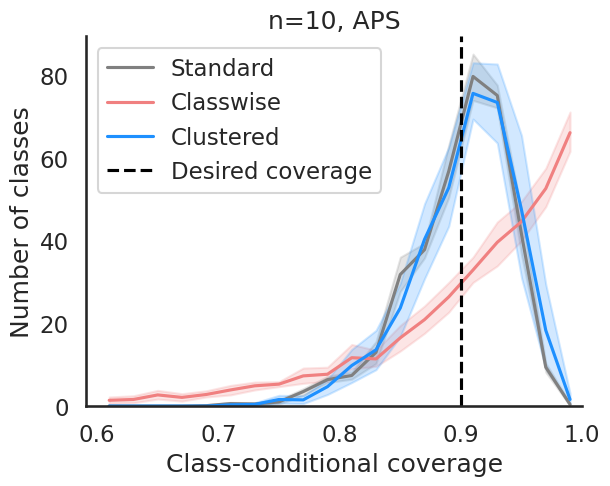

Number of seeds found: 10


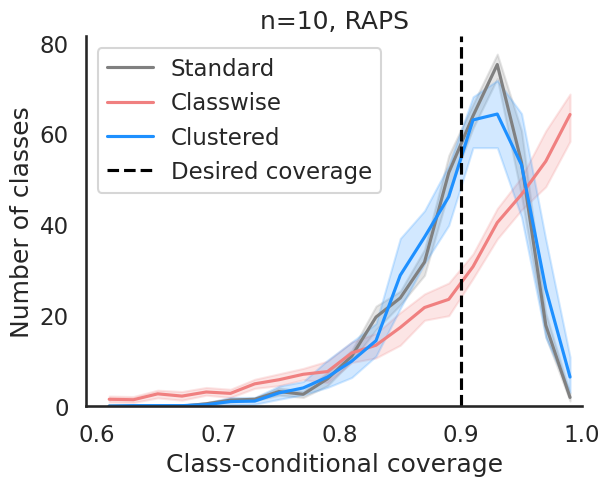

Number of seeds found: 10


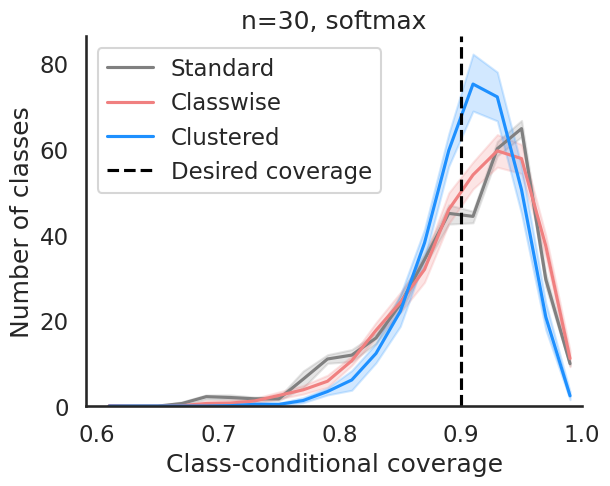

Number of seeds found: 10


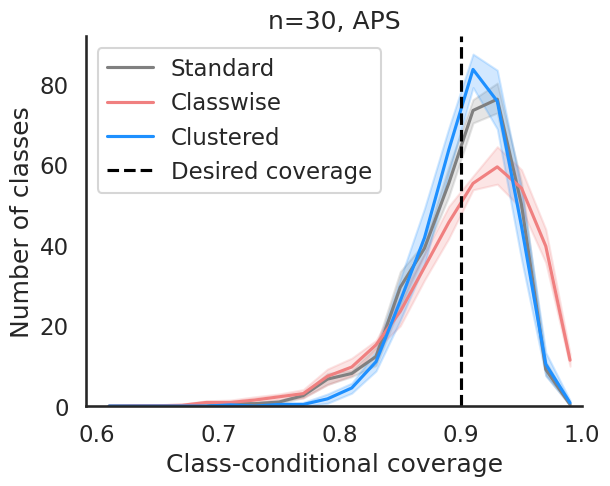

Number of seeds found: 10


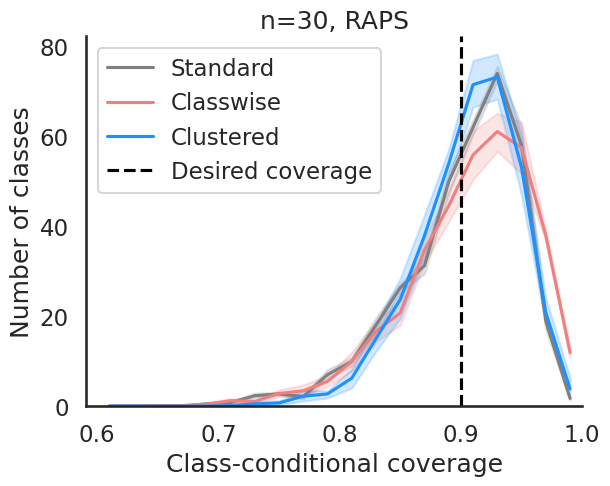

In [12]:
# Plot histograms of class coverage

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=.6, vmax=1, nbins=20, title=f'n={n_totalcal}, {score}')

Number of seeds found: 10


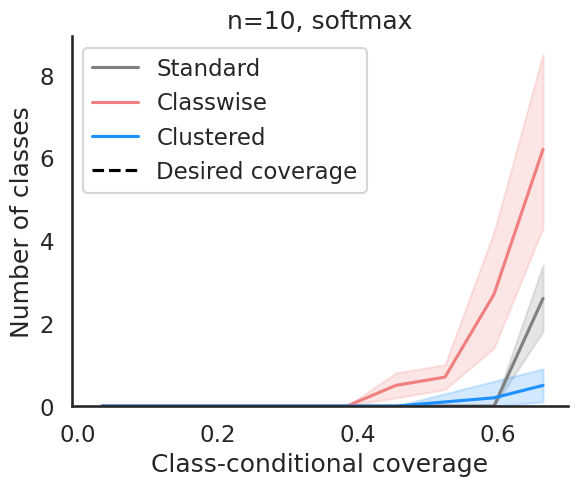

Number of seeds found: 10


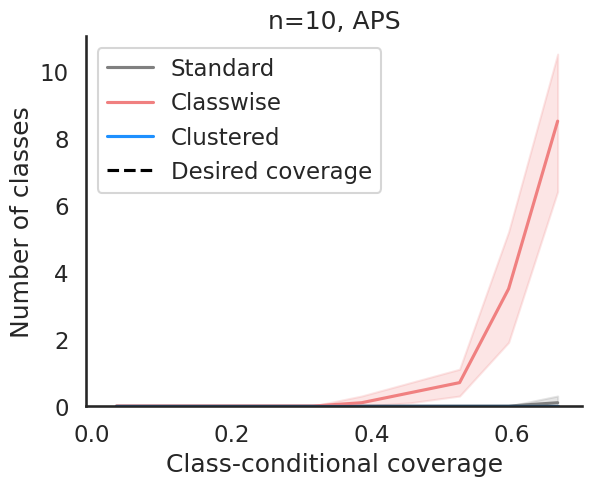

Number of seeds found: 10


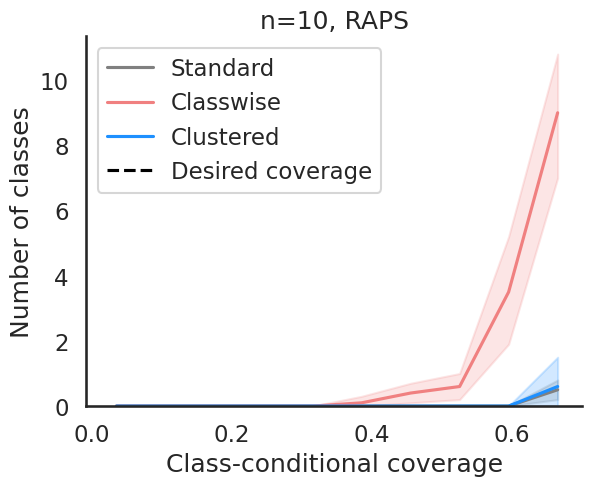

Number of seeds found: 10


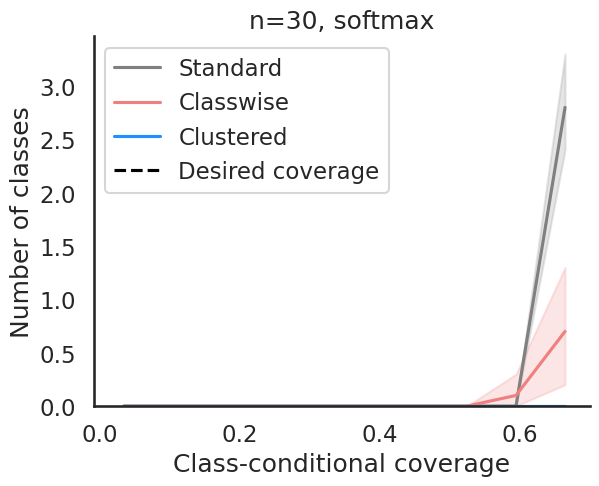

Number of seeds found: 10


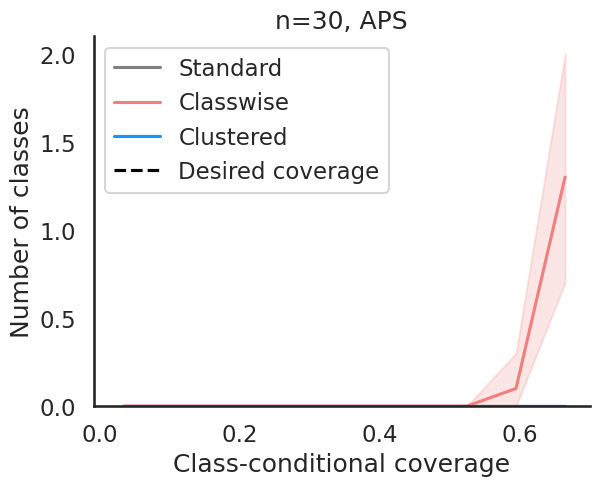

Number of seeds found: 10


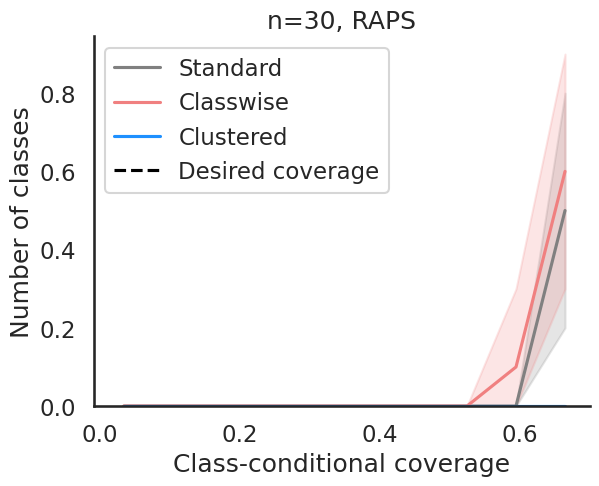

In [13]:
# Plot histograms of class coverage, focus on very undercovered classes

for n_totalcal in n_totalcal_list:
    for score in score_function_list:
        folder = f'{save_folder}/n_totalcal={n_totalcal}/score={score}/'
        plot_class_coverage_histogram(folder, desired_cov=1-alpha, vmin=0, vmax=.7, nbins=10, title=f'n={n_totalcal}, {score}')